# imports

In [289]:
import pandas as pd
import numpy as np

# for missing values
from sklearn.impute import KNNImputer

# for training and test
from sklearn.model_selection import train_test_split

# for model
from sklearn.tree import DecisionTreeClassifier
#accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# for cros validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [225]:
first_data = pd.read_excel('kepler_data.xlsx')

first_data.head()

,# This file was produced by the NASA Exoplanet Archive http://exoplanetarchive.ipac.caltech.edu,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# COLUMN kepid: KepID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,# COLUMN kepoi_name: KOI Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# COLUMN kepler_name: Kepler Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,# COLUMN koi_disposition: Exoplanet Archive Di...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Altering the data to workable form

In [226]:
# remove all the useless columns at the start of the data
first_data.drop(first_data.index[0:51], axis=0, inplace=True)
first_data.head()

,# This file was produced by the NASA Exoplanet Archive http://exoplanetarchive.ipac.caltech.edu,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
51,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
52,10797460.0,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.0,0.0,0.0,0.0,0.0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
53,10797460.0,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0.0,0.0,0.0,0.0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
54,10811496.0,K00753.01,NaN,CANDIDATE,CANDIDATE,0.0,0.0,0.0,0.0,0.0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
55,10848459.0,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0.0,1.0,0.0,0.0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.28521,15.597


In [227]:
# setting the columns of the dataframe
first_data.columns = first_data.iloc[0]
first_data.drop(first_data.index[0], axis=0, inplace=True)
first_data.head()

51,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
52,10797460.0,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.0,0.0,0.0,0.0,0.0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
53,10797460.0,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0.0,0.0,0.0,0.0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
54,10811496.0,K00753.01,NaN,CANDIDATE,CANDIDATE,0.0,0.0,0.0,0.0,0.0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
55,10848459.0,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0.0,1.0,0.0,0.0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.28521,15.597
56,10854555.0,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.0,0.0,0.0,0.0,0.0,...,-211.0,4.438,0.07,-0.21,1.046,0.334,-0.133,288.75488,48.2262,15.509


In [228]:
# resetting the index of dataframe
first_data=first_data.reset_index(drop=True)

In [229]:
# renaming index
first_data = first_data.rename_axis(None, axis = 1)

In [230]:
first_data

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460.0,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.0,0.0,0.0,0.0,0.0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460.0,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0.0,0.0,0.0,0.0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496.0,K00753.01,NaN,CANDIDATE,CANDIDATE,0.0,0.0,0.0,0.0,0.0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459.0,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0.0,1.0,0.0,0.0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.28521,15.597
4,10854555.0,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.0,0.0,0.0,0.0,0.0,...,-211.0,4.438,0.07,-0.21,1.046,0.334,-0.133,288.75488,48.2262,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151.0,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0.0,1.0,1.0,0.0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825.0,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0.0,0.0,0.0,0.0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276.0,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0.0,0.0,1.0,0.0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286.0,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0.0,0.0,0.0,0.0,...,-128.0,2.992,0.03,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


# Working with the data

In [231]:
# checking for null values
first_data.isna().sum()

kepid                   0
kepoi_name              0
kepler_name          7204
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

In [232]:
# checking the target variable
first_data.groupby(['koi_disposition']).count()

,kepid,kepoi_name,kepler_name,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_disposition,,,,,,,,,,,,,,,,,,,,,
CANDIDATE,2366,2366,0,2366,1762,2366,2366,2366,2366,2366,...,2255,2261,2255,2255,2261,2255,2255,2366,2366,2366
CONFIRMED,2358,2358,2358,2358,2346,2358,2358,2358,2358,2358,...,2344,2357,2357,2357,2357,2357,2357,2358,2358,2358
FALSE POSITIVE,4840,4840,2,4840,3946,4840,4840,4840,4840,4840,...,4482,4583,4484,4484,4583,4484,4484,4840,4840,4839


In [233]:
# now dropping the columns that are many null values
first_data = first_data.drop(['kepler_name','kepoi_name','koi_teq_err1','koi_teq_err2','koi_tce_delivname'], axis=1)


In [234]:
first_data

,kepid,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460.0,CONFIRMED,CANDIDATE,1.0,0.0,0.0,0.0,0.0,9.488036,0.000028,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460.0,CONFIRMED,CANDIDATE,0.969,0.0,0.0,0.0,0.0,54.418383,0.000248,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496.0,CANDIDATE,CANDIDATE,0.0,0.0,0.0,0.0,0.0,19.89914,0.000015,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459.0,FALSE POSITIVE,FALSE POSITIVE,0.0,0.0,1.0,0.0,0.0,1.736952,0.0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.28521,15.597
4,10854555.0,CONFIRMED,CANDIDATE,1.0,0.0,0.0,0.0,0.0,2.525592,0.000004,...,-211.0,4.438,0.07,-0.21,1.046,0.334,-0.133,288.75488,48.2262,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151.0,FALSE POSITIVE,FALSE POSITIVE,0.0,0.0,1.0,1.0,0.0,0.527699,0.0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825.0,CANDIDATE,CANDIDATE,0.497,0.0,0.0,0.0,0.0,1.739849,0.000018,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276.0,FALSE POSITIVE,FALSE POSITIVE,0.021,0.0,0.0,1.0,0.0,0.681402,0.000002,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286.0,CANDIDATE,CANDIDATE,0.092,0.0,0.0,0.0,0.0,333.486169,0.004235,...,-128.0,2.992,0.03,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [235]:
first_data.isna().sum()

kepid                   0
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad    

# Using Imputer

In [236]:
# defining imputer
imputer = KNNImputer()

# selecting the numeric columns
columns = first_data.columns[first_data.isnull().any()]
columns

Index(['koi_score', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'koi_kepmag'],
      dtype='object')

In [237]:
# applying imputer to missing columns only
first_data[columns]= imputer.fit_transform(first_data[columns])

In [238]:
first_data.isna().sum()

kepid                0
koi_disposition      0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag 

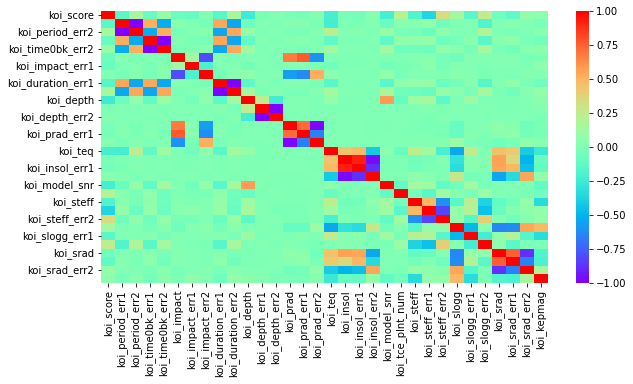

In [270]:
# correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(first_data.corr(), annot=False, cmap='rainbow')
plt.show()

# Defining the features and target

In [239]:
# features 
features = first_data.drop(['koi_disposition','kepid'], axis=1)
features.head()
features[features == 'CANDIDATE'].any()

koi_pdisposition      True
koi_score            False
koi_fpflag_nt        False
koi_fpflag_ss        False
koi_fpflag_co        False
koi_fpflag_ec        False
koi_period           False
koi_period_err1      False
koi_period_err2      False
koi_time0bk          False
koi_time0bk_err1     False
koi_time0bk_err2     False
koi_impact           False
koi_impact_err1      False
koi_impact_err2      False
koi_duration         False
koi_duration_err1    False
koi_duration_err2    False
koi_depth            False
koi_depth_err1       False
koi_depth_err2       False
koi_prad             False
koi_prad_err1        False
koi_prad_err2        False
koi_teq              False
koi_insol            False
koi_insol_err1       False
koi_insol_err2       False
koi_model_snr        False
koi_tce_plnt_num     False
koi_steff            False
koi_steff_err1       False
koi_steff_err2       False
koi_slogg            False
koi_slogg_err1       False
koi_slogg_err2       False
koi_srad             False
k

In [240]:
# defining labels
labels = first_data['koi_disposition']
labels

0            CONFIRMED
1            CONFIRMED
2            CANDIDATE
3       FALSE POSITIVE
4            CONFIRMED
             ...      
9559    FALSE POSITIVE
9560         CANDIDATE
9561    FALSE POSITIVE
9562         CANDIDATE
9563    FALSE POSITIVE
Name: koi_disposition, Length: 9564, dtype: object

# Getting dummies for feature column

In [241]:
# since we have 'koi_pdisposition' a categorical column in the feature we need to get dummies
features = pd.get_dummies(features, columns=['koi_pdisposition'])


In [242]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# Decision Tree Classifier

In [243]:
# defining the model
tree = DecisionTreeClassifier(random_state=0)

In [244]:
# fitting the model
tree.fit(X_train, y_train)

# predicting
y_predict = tree.predict(X_test)

In [256]:
y_predict[294]

'FALSE POSITIVE'

In [255]:
y_test[294]

'CONFIRMED'

In [260]:
metrics.accuracy_score(y_test, y_predict)

0.8813382122320962

In [262]:
confusion_matrix(y_test, y_predict)

array([[365,  95,   0],
       [125, 351,   3],
       [  0,   4, 970]], dtype=int64)

# Hyperparameter Tuning

In [273]:
# defining tree
tree_ht =  DecisionTreeClassifier(random_state=94)

In [276]:
# defining grid search Cv
# these are the hyper parameters we are tuning with the values
params = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_leaf': [5, 10, 20, 50, 70],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=tree_ht, param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

In [277]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=94), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [5, 10, 20, 50, 70]},
             scoring='accuracy', verbose=1)

In [279]:
# scores obtained by different params
scores = pd.DataFrame(grid_search.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.137780,0.008893,0.021655,0.013629,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.894929,0.903816,0.903293,0.906381,0.902105,0.004304,11
1,0.182055,0.041437,0.017973,0.003459,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.894929,0.903816,0.903293,0.906381,0.902105,0.004304,11
2,0.212695,0.026252,0.020773,0.001694,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.894929,0.903816,0.903293,0.906381,0.902105,0.004304,11
3,0.142860,0.018395,0.013579,0.004998,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.894929,0.903816,0.903293,0.906381,0.902105,0.004304,11
4,0.133379,0.013898,0.017602,0.007852,gini,3,70,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.894929,0.903816,0.903293,0.906381,0.902105,0.004304,11


In [281]:
# finding the largest number of mean test score
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
9,0.168657,0.013512,0.024119,0.009724,gini,5,70,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.897020,0.905907,0.906952,0.912657,0.905634,0.005598,1
8,0.161307,0.005523,0.017215,0.007849,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.898066,0.907475,0.904861,0.906381,0.904196,0.003659,2
28,0.225316,0.018725,0.012576,0.004521,entropy,5,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.900680,0.902248,0.907475,0.905858,0.904065,0.002721,3
27,0.280274,0.025203,0.018490,0.005092,entropy,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.902771,0.901725,0.905384,0.905858,0.903934,0.001735,4
26,0.259664,0.028733,0.012608,0.001999,entropy,5,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.902771,0.900157,0.905907,0.905858,0.903673,0.002395,5


In [285]:
# getting the best estimator
dt_best =grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=5, min_samples_leaf=70, random_state=94)

**we can see the best estimator parameters are at max_depth=5, min_samples_leaf=70, random_state=94**

In [286]:
print(classification_report(y_test, dt_best.predict(X_test)))

                precision    recall  f1-score   support

     CANDIDATE       0.82      0.78      0.80       460
     CONFIRMED       0.79      0.82      0.81       479
FALSE POSITIVE       1.00      1.00      1.00       974

      accuracy                           0.90      1913
     macro avg       0.87      0.87      0.87      1913
  weighted avg       0.90      0.90      0.90      1913



# Cross Validation

In [290]:
# instance of Kflod
kf = KFold()

# comparing with logistic Regression
decision_tree = DecisionTreeClassifier(random_state=0)
log_model = LogisticRegression(random_state=0)

# finding cross validation score for both models
score_dec_tree = cross_val_score(decision_tree, features, labels, cv=kf)
score_log_model = cross_val_score(log_model, features, labels, cv=kf)

C:\Users\ashok\DemoVirtualEnv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashok\DemoVirtualEnv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [291]:
# Now printing the values
print(' Cross Validation Score for Decision Tree: ',np.mean(score_dec_tree))
print(' Cross Validation Score for Logistic Regression:', np.mean(score_log_model))

 Cross Validation Score for Decision Tree:  0.8719261734837831
 Cross Validation Score for Logistic Regression: 0.5050319658272948


**we can clearly see the result and difference in the models**